# Load Datasets

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [92]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')
spray = pd.read_csv('../datasets/spray.csv')
weather = pd.read_csv('../datasets/weather.csv')


In [93]:
train.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [94]:
test.head(5)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [95]:
spray.head(5)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [96]:
weather.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


# Train 

## Null Values and Duplicates

In [97]:
# no null values

train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [98]:
#1062 dupes - likely from >50 per trap

train.duplicated(keep=False).sum()

1062

In [100]:
train.loc[train.duplicated(keep=False), :]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2013-09-06,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,1
10259,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10262,2013-09-12,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,0
10391,2013-09-19,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,13,0


## Species

In [101]:
train['Species'].value_counts(normalize=True)

CULEX PIPIENS/RESTUANS    0.452313
CULEX RESTUANS            0.260803
CULEX PIPIENS             0.256901
CULEX TERRITANS           0.021131
CULEX SALINARIUS          0.008186
CULEX TARSALIS            0.000571
CULEX ERRATICUS           0.000095
Name: Species, dtype: float64

Text(0.5, 1.0, 'samples collected per species')

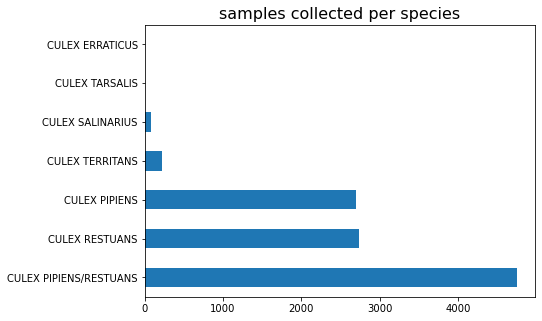

In [102]:
train['Species'].value_counts().plot(kind='barh', figsize=(7,5))
plt.title('samples collected per species', fontsize=16)

In [147]:
#WNV by species type

wnv_species = train.groupby('Species')['WnvPresent'].sum().sort_values(ascending=False)
wnv_species

Species
CULEX PIPIENS/RESTUANS    262
CULEX PIPIENS             240
CULEX RESTUANS             49
CULEX ERRATICUS             0
CULEX SALINARIUS            0
CULEX TARSALIS              0
CULEX TERRITANS             0
Name: WnvPresent, dtype: int64

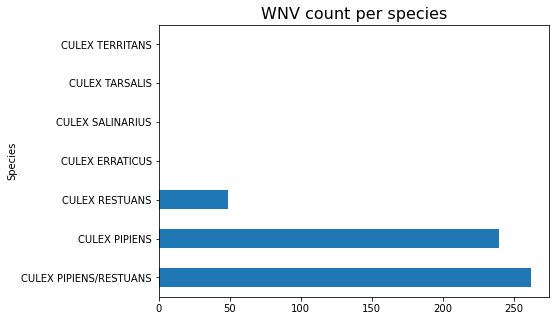

In [149]:
wnv_species.plot(kind='barh', figsize=(7,5))
plt.title('WNV count per species', fontsize=16);

## KIV combine mosquito count

In [105]:
[col for col in train.columns if col not in ['NumMosquitos', 'WnvPresent']]

['Date',
 'Address',
 'Species',
 'Block',
 'Street',
 'Trap',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy']

In [106]:
train.groupby([col for col in train.columns if col not in ['NumMosquitos', 'WnvPresent']]).sum()

NumMosquitos  \
Date       Address                                            Species                Block Street              Trap AddressNumberAndStreet                Latitude  Longitude  AddressAccuracy                 
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA        CULEX PIPIENS/RESTUANS 11     W ROOSEVELT        T048 1100  W ROOSEVELT, Chicago, IL        41.867108 -87.654224 8                           1   
                                                              CULEX RESTUANS         11     W ROOSEVELT        T048 1100  W ROOSEVELT, Chicago, IL        41.867108 -87.654224 8                           2   
           1100 South Peoria Street, Chicago, IL 60608, USA   CULEX RESTUANS         11     S PEORIA ST        T091 1100  S PEORIA ST, Chicago, IL        41.862292 -87.648860 8                           1   
           1100 West Chicago Avenue, Chicago, IL 60642, USA   CULEX RESTUANS         11     W CHICAGO          T049 1100  W CHICAGO, Chicago, IL          41.896282 -87.655232 8                           1   
           1500 North Long Avenue, Chicago, IL 60651, USA     CULEX RESTUANS         15     N LONG AVE         T153 1500  N LONG AVE, Chicago, IL         41.907645 -87.760886 8                           1   
...                                                                                                                                                                                                      ...   
2013-09-26 South Stony Island Avenue, Chicago, IL, USA        CULEX PIPIENS          10     S STONY ISLAND AVE T138 1000  S STONY ISLAND AVE, Chicago, IL 41.726465 -87.585413 5                           6   
                                                              CULEX PIPIENS/RESTUANS 10     S STONY ISLAND AVE T138 1000  S STONY ISLAND AVE, Chicago, IL 41.726465 -87.585413 5                           4   
           South Vincennes Avenue, Chicago, IL, USA           CULEX PIPIENS/RESTUANS 10     S VINCENNES        T089 1000  S VINCENNES, Chicago, IL        41.723195 -87.649970 5                           4   
           University of Illinois at Chicago, 1100 South A... CULEX PIPIENS/RESTUANS 11     S ASHLAND AVE      T090 1100  S ASHLAND AVE, Chicago, IL      41.868077 -87.666901 9                           2   
           West Garfield Boulevard, Chicago, IL, USA          CULEX PIPIENS/RESTUANS 90     W GARFIELD BLVD    T226 9000  W GARFIELD BLVD, Chicago, IL    41.793818 -87.654234 5                           8   

                                                                                                                                                                                                WnvPresent  
Date       Address                                            Species                Block Street              Trap AddressNumberAndStreet                Latitude  Longitude  AddressAccuracy              
2007-05-29 1100 Roosevelt Road, Chicago, IL 60608, USA        CULEX PIPIENS/RESTUANS 11     W ROOSEVELT        T048 1100  W ROOSEVELT, Chicago, IL        41.867108 -87.654224 8                         0  
                                                              CULEX RESTUANS         11     W ROOSEVELT        T048 1100  W ROOSEVELT, Chicago, IL        41.867108 -87.654224 8                         0  
           1100 South Peoria Street, Chicago, IL 60608, USA   CULEX RESTUANS         11     S PEORIA ST        T091 1100  S PEORIA ST, Chicago, IL        41.862292 -87.648860 8                         0  
           1100 West Chicago Avenue, Chicago, IL 60642, USA   CULEX RESTUANS         11     W CHICAGO          T049 1100  W CHICAGO, Chicago, IL          41.896282 -87.655232 8                         0  
           1500 North Long Avenue, Chicago, IL 60651, USA     CULEX RESTUANS         15     N LONG AVE         T153 1500  N LONG AVE, Chicago, IL         41.907645 -87.760886 8                         0  
...                                                 

## Traps

In [155]:
train['Trap'].nunique()

136

In [153]:
train['Trap'].value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T076       5
T094B      5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

<AxesSubplot:ylabel='Frequency'>

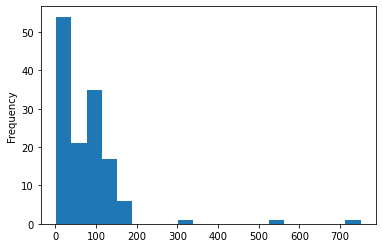

In [154]:
train['Trap'].value_counts().plot(kind='hist', bins=20)

## Datetime

In [108]:
train['Date'] = pd.to_datetime(train['Date'])

In [109]:
print(train.Date.min())
print(train.Date.max())

2007-05-29 00:00:00
2013-09-26 00:00:00


In [158]:
train.groupby('Date')['WnvPresent'].count()

Date
2007-05-29     25
2007-06-05     60
2007-06-26     70
2007-06-29     46
2007-07-02     74
             ... 
2013-08-29    143
2013-09-06    143
2013-09-12    139
2013-09-19    112
2013-09-26     92
Name: WnvPresent, Length: 95, dtype: int64

In [141]:
#Create new year, month, week, year + month columns

train['Year'] = train['Date'].apply(lambda x:x.year)
train['Month'] = train['Date'].apply(lambda x:x.month)
train['WeekofYear'] = train['Date'].apply(lambda x:x.weekofyear)
train['YearMonth'] = train['Date'].apply(lambda x: '{}-{:02d}'.format(x.year, x.month))

In [166]:
train['WnvPresent'].sum()

551

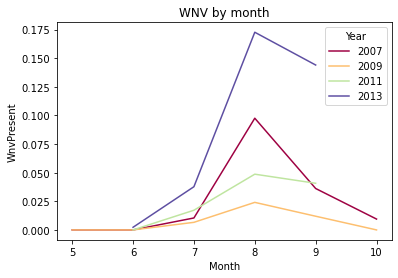

In [193]:
plt.plot(figsize=(15,5))

wnv_time = train[['Month','Year','WnvPresent']]
sns.lineplot(x = wnv_time['Month'], y = 'WnvPresent', data = wnv_time, hue = 'Year', ci = None, legend = 'full', palette = 'Spectral')
plt.title('WNV by month');

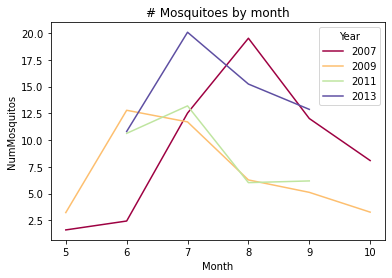

In [197]:
plt.plot(figsize=(15,5))

mosquito_time = train[['Month','Year','NumMosquitos']]
sns.lineplot(x = wnv_time['Month'], y = 'NumMosquitos', data = mosquito_time, hue = 'Year', ci = None, legend = 'full', palette = 'Spectral')
plt.title('# Mosquitoes by month');

# Spray

In [119]:
spray['Date'] = pd.to_datetime(spray['Date'])

In [125]:
spray['Time'] = pd.to_datetime(spray['Time'])

In [133]:
spray['Time'] = pd.to_datetime(spray['Time'], format='%H:%M:%S').dt.time

## Null values and Duplicates

In [111]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [134]:
#should probably drop them

spray.loc[spray['Time'].isnull(),:].groupby('Date').count()

,Time,Latitude,Longitude
Date,,,
2011-09-07,0,584,584


In [187]:
#543 duplciated spray entries (all same date)

spray.duplicated(keep=False).sum()

543

In [190]:
spray.loc[spray.duplicated(keep=False),:].sort_values(by='Time')

,Date,Time,Latitude,Longitude
484,2011-09-07,19:43:40,41.983917,-87.793088
485,2011-09-07,19:43:40,41.983917,-87.793088
857,2011-09-07,19:44:32,41.986460,-87.794225
856,2011-09-07,19:44:32,41.986460,-87.794225
855,2011-09-07,19:44:32,41.986460,-87.794225
...,...,...,...,...
661,2011-09-07,19:44:32,41.986460,-87.794225
660,2011-09-07,19:44:32,41.986460,-87.794225
659,2011-09-07,19:44:32,41.986460,-87.794225
673,2011-09-07,19:44:32,41.986460,-87.794225


In [137]:
#only 10 unique dates of spray

spray['Date'].nunique()

10

In [191]:
spray['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

# Weather

In [203]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [143]:
weather[.head()]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


## Missing Values

In [ ]:
#missing values denoted by M per data dictionary

In [205]:
weather.loc[weather['Tavg'] == 'M',:]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,...,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,...,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,...,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,...,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71,42,M,M,39,45,M,M,...,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,M,M,48,54,M,M,...,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,M,M,48,54,M,M,...,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,M,M,44,50,M,M,...,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,...,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


things to check:

- which weather feature correlates with mosquitoes
- temp, rain, humidity, dewpoint